# Import libraries

In [ ]:
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from plotly import graph_objs as go
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import functools
import squarify
import nltk
import re

nltk.download("punkt")
nltk.download("stopwords")

# Load data

In [2]:
train=pd.read_csv("trainTwitter.csv")
train

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

# 1) Knowledge of the data

In [3]:
#Get tweets column
rows = train["tweet"].to_list()

stop_words= stopwords.words('english') # English stopwords
# Columns values
NumWords_list=[]
NumLetters_list=[]
NumNumbers_list=[]
NumSymbols1_list=[]
NumSymbols2_list=[]
Average_Word_Size_list=[]
NumStopWords_list=[]
NumAngerExpression_list=[]

for row in rows:
    tokenize = word_tokenize(row) # Split the text row
    # Initialization the counters
    NumWords=0
    NumLetters=0
    NumNumbers=0
    NumSymbols1=0
    NumSymbols2=0
    NumStopWords=0
    NumAngerExpression=0
    
    for word in tokenize:
        if word.isalpha(): # Number of Words
            NumWords+=1
            NumLetters+=len(word) # Number of letters
            if word in stop_words: # Number of stopwords
                NumStopWords+=1
            if word.isupper(): # Number of anger expression
                NumAngerExpression+=1
                
        elif word.isdigit(): # Number of numeric characters   
            NumNumbers+=1
        elif word =='#': # Number of #   
            NumSymbols1+=1
        elif word =='@': # Number of @  
            NumSymbols2+=1
            
    # Adding the values 
    NumWords_list.append(NumWords)
    NumLetters_list.append(NumLetters)
    Average_Word_Size_list.append(NumLetters/max(NumWords,1))
    NumStopWords_list.append(NumStopWords)
    NumNumbers_list.append(NumNumbers)
    NumSymbols1_list.append(NumSymbols1)
    NumSymbols2_list.append(NumSymbols2)
    NumAngerExpression_list.append(NumAngerExpression)

### Build and save the new data set 

In [4]:
new_data={} # The new data dict

# Build the new data in a dict
new_data['NWords']=NumWords_list
new_data['NLetters']=NumLetters_list
new_data['AvgWordSize']=Average_Word_Size_list
new_data['NStopWords']=NumStopWords_list
new_data['NNumbers']=NumNumbers_list
new_data['N #']=NumSymbols1_list
new_data['N @']=NumSymbols2_list
new_data['NAngerWords']=NumAngerExpression_list

# Save the new data frame as csv file
new_DataFrame = pd.DataFrame(new_data)
new_DataFrame.to_csv("NewTwitter.csv")

# Show the last 20 rows 
new_DataFrame.head(10)

NWords  NLetters  AvgWordSize  NStopWords  NNumbers  N #  N @  NAngerWords
0      18        79     4.388889          10         0    1    1            0
1      19        89     4.684211           5         0    3    2            0
2       3        17     5.666667           1         0    0    0            0
3      11        32     2.909091           5         0    1    0            0
4       4        30     7.500000           1         0    1    0            0
5      18        88     4.888889           7         0    1    0            0
6      10        47     4.700000           0         0    0    8            0
7      19        97     5.105263           6         0    7    0            0
8      10        61     6.100000           3         0    5    0            0
9       7        24     3.428571           4         0    1    2            0

# 2) Visualization

### Wordcloud for the full collection

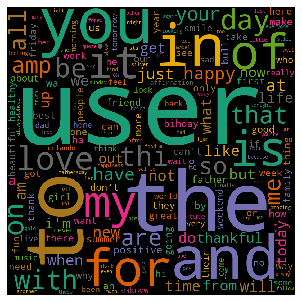

In [6]:
#Get cloud words
cloud_words = ' '.join([text for text in train['tweet']]) 

wordcloud = WordCloud(width = 800, height = 800,colormap="Dark2", stopwords =[],
                min_font_size = 10,collocations=False).generate(cloud_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 4), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

עננה שמיצג את המילים הנופצות ביותר וכל שהמילה גדולה יותר כל שהיא נפוצה יותר , גרף זה עוזר לנו ‏להבין את הטקסיט כך שמילות קישור נראות הרבה . .

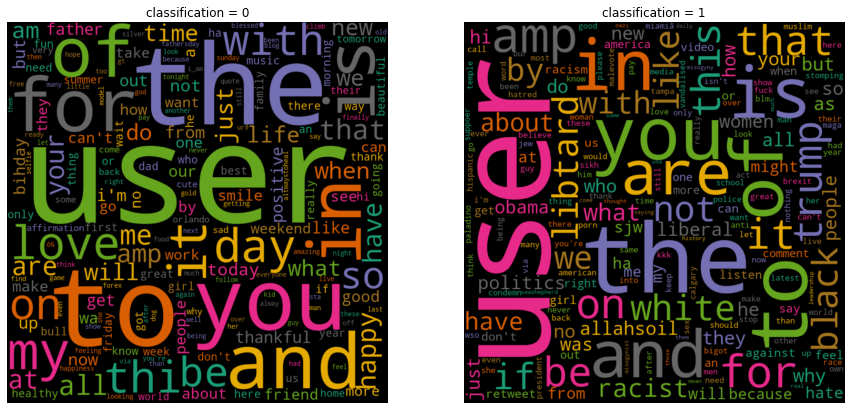

In [30]:
# Wordcloud for each classification (0 & 1)

cloud_words1 = ' '.join([text for text in train[train['label']==0]['tweet']])
cloud_words2 = ' '.join([text for text in train[train['label']==1]['tweet']]) 

wordcloud1 = WordCloud(width = 800, height = 800,colormap="Dark2", stopwords =[],
                min_font_size = 10,collocations=False).generate(cloud_words1) 

wordcloud2 = WordCloud(width = 800, height = 800,colormap="Dark2", stopwords =[],
                min_font_size = 10,collocations=False).generate(cloud_words2) 

fig,plots= plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)

plots[0].imshow(wordcloud1,interpolation="bilinear")
plots[1].imshow(wordcloud2,interpolation="bilinear")

plots[0].set_title('classification = 0')
plots[1].set_title('classification = 1')
plots[0].axis("off")
plots[1].axis("off")

plt.show()

עננות שמיצגות את המילים הנופצות ביותר בטויטים לפי סיווגהם (‏סיווג 1 ו 0 )וכל שהמילה גדולה יותר כל שהיא נפוצה יותר , גרף זה עוזר לנו ‏להבין את הטויטים  .

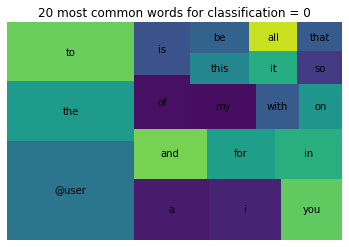

In [15]:
#Tree map for the 20 most common words for classification = 0

#Fine the 20 most common words for classification = 0
freq1= pd.Series(' '.join(train[train['label']==0]['tweet']).split()).value_counts()[:20]
squarify.plot(sizes=list(freq1),label=list(freq1.index))
plt.title('20 most common words for classification = 0')
plt.axis('off')
plt.show()


  שמיצג את המילים הנופצות ביותר בטיטים של סיווג 0 וכל שהמרובע של המילה גדול כל שהמילה נפוצה יותר treemap.

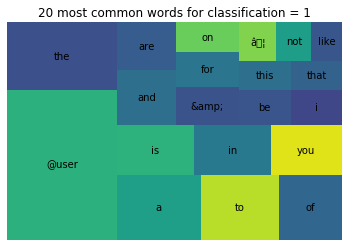

In [18]:
#Tree map for the 20 most common words for classification = 1

#Fine the 20 most common words for classification = 1
freq2= pd.Series(' '.join(train[train['label']==1]['tweet']).split()).value_counts()[:20]
squarify.plot(sizes=list(freq2),label=list(freq2.index))
plt.title('20 most common words for classification = 1')
plt.axis('off')
plt.show()


  שמיצג את המילים הנופצות ביותר בטיטים של סיווג 1 וכל שהמרובע של המילה גדול כל שהמילה נפוצה יותר treemap.

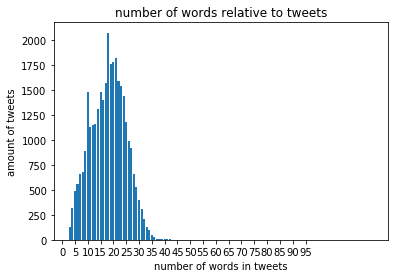

In [44]:
# Graph : number of words relative to tweets.
tweets=train["tweet"].to_list()
    
values={}
for tweet in tweets:
    num_words=len(word_tokenize(tweet))
    if num_words in values:
        values[num_words]+=1
    else:
        values[num_words]=1

plt.title('number of words relative to tweets')
plt.ylabel('amount of tweets')
plt.xlabel('number of words in tweets')
plt.xticks(range(0,100,5))

plt.bar(list(values.keys()),list(values.values()))

plt.show()

הגרף הזה מיצג כמות המילים בטויטה , הגרף הזה עוזר לנו להבין כמה מילים בטויטים ומה ההתפלגות של כמות המילים באוסף הטקסט

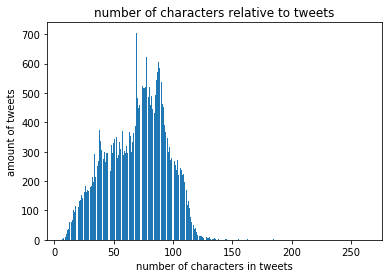

In [39]:
# Graph : Number of characters relative to tweets.
tweets=train["tweet"].to_list()
    
values={}
for tweet in tweets:
    num_characters=functools.reduce(lambda a,b : a+b,map(len,word_tokenize(tweet)))
    if num_characters in values:
        values[num_characters]+=1
    else:
        values[num_characters]=1

plt.title('number of characters relative to tweets')
plt.ylabel('amount of tweets')
plt.xlabel('number of characters in tweets')

plt.bar(list(values.keys()),list(values.values()))

plt.show()

הגרף הזה מיצג כמות האותיות בטויטה , הגרף הזה עוזר לנו להבין כמה אותיות בטויטים ומה ההתפלגות של כמות האותיות באוסף הטקסט

In [7]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:30]
freq = pd.DataFrame(freq).reset_index()

freq.columns = ['Commmon Word','count']

fig = px.bar(freq, x="count",y='Commmon Word' ,title='Commmon Words in Tweets', orientation='h', 
             width=700, height=700,color='Commmon Word')
fig.show()

גרף שמציג את כמות המילים הנפוצות ביותר , גרף זה עוזר לנו לראות המילים הנפוצות ביותר וכמות שלהם כך שמיות קישור הם הכי נפוצות..

In [8]:
train['tweet_len'] = train.tweet.apply(lambda x:len(x))

data = [go.Box(y=train['tweet_len'],name='')]
layout = go.Layout(title = 'Comparison of text length in Tweets ')
fig = go.Figure(data=data, layout=layout)
fig.show()

גרף שמיצג השוואה בין אורכי הטויטים , והמרובע מיצג את הטווח של האורכים (אורכים שחזרו על עצם הכי הרבה )

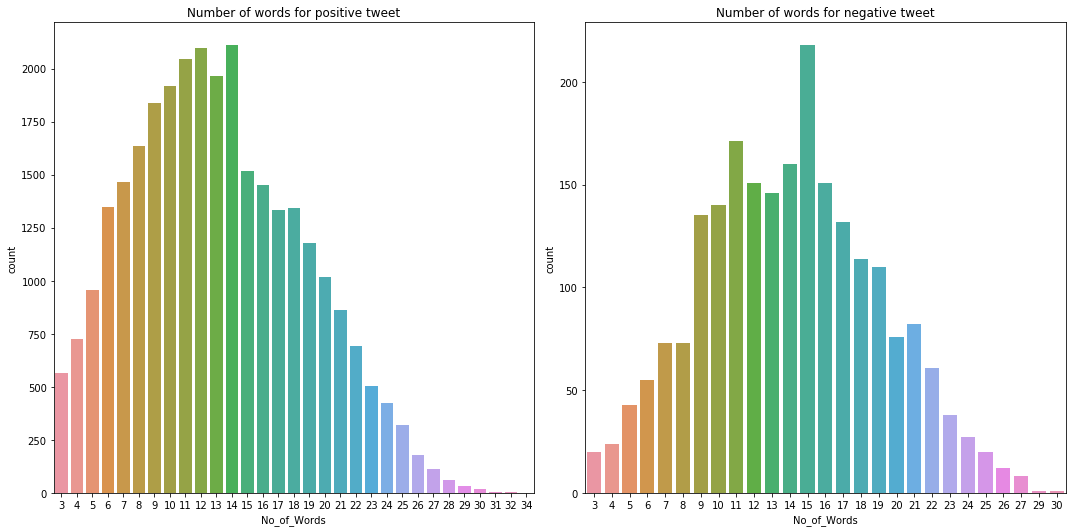

In [9]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))

data = pd.read_csv("trainTwitter.csv")

data['No_of_Words']=[len(tweet.split()) for tweet in data.tweet]

sns.countplot(x=data[data['label'] == 0]['No_of_Words'],label='Positive',ax=ax[0])
sns.countplot(x=data[data['label'] == 1]['No_of_Words'],label='Negative',ax=ax[1])
ax[0].set_title('Number of words for positive tweet')
ax[1].set_title('Number of words for negative tweet')
plt.tight_layout()
plt.show()

הגרפים האילו מצגים את מספר המילים בטויטה בכל סיווג . כך שהם מציגים התפגות של כמות המילים בכל סיווג .

# 3) Pre-processing

## Invert capital letters to small letters

In [14]:
train['tweet2']=train['tweet'].str.lower()

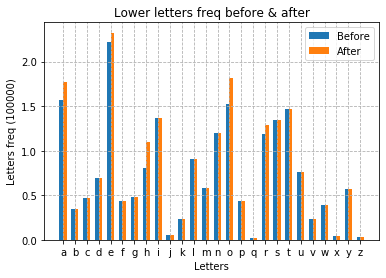

In [13]:
# English lower letters
lowers='abcdefghijklmnopqrstuvwxyz'
labels=[x for x in lowers]

vals_before=[]
data_before=pd.Series(train['tweet']).str
vals_after=[]
data_after=pd.Series(train['tweet2']).str

for letter in lowers:
    vals_before.append(sum(list(data_before.count(letter)))/100000)
    vals_after.append(sum(list(data_after.count(letter)))/100000)

xticks=range(len(labels))
plt.title('Lower letters freq before & after')
plt.ylabel('Letters freq (100000)')
plt.xlabel('Letters')
plt.xticks(xticks,labels)

plt.bar(xticks,vals_before,width=-0.3, label = 'Before', align='edge')
plt.bar(xticks,vals_after,width= 0.3, label = 'After', align='edge')

plt.legend(loc='upper right')
plt.grid(linestyle="--")

plt.show()


הגרף מציג תדירות האותיות לפני ואחרי הפיכת האותויות הגדולות לקטנות ביחידות 100000 (בגלל שאין כמעט אותיות גדולות אז הוספנו משלנו)
המסקנה היא שתדירות האותיות הקטנות תגדל אחרי ההפיכה בגלל שתדירות כל אות תהיה סכום של אותיות קטנות וגדולות .

## Removing punctuation marks and special characters

In [15]:
def Clean(word):
    '''
    Function that clean the word from the punctuation marks and special characters.
    '''
    return re.sub('[^A-Za-z0-9]+', '', word)

train['tweet2'] = train['tweet2'].apply(lambda y: " ".join(Clean(x) for x in y.split()))

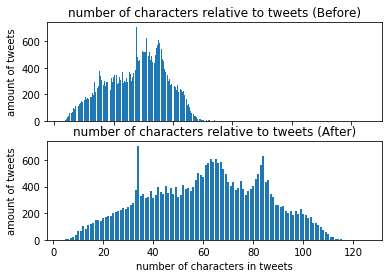

In [44]:
#Tweets before and after
tweets=train["tweet"].to_list()
tweets2=train["tweet2"].to_list()

# Values before
values={}
for tweet in tweets:
    num_characters=functools.reduce(lambda a,b : a+b,map(len,word_tokenize(tweet)))
    if num_characters in values:
        values[num_characters]+=1
    else:
        values[num_characters]=1
        
# Values after
values2={}
for tweet in tweets2:
    num_characters=functools.reduce(lambda a,b : a+b,map(len,word_tokenize(tweet)))
    if num_characters in values2:
        values2[num_characters]+=1
    else:
        values2[num_characters]=1

# Graph : Number of characters relative to tweets (before & after)
fig,plots= plt.subplots(2)

plots[0].bar(list(values.keys()),list(values.values()))
plots[1].bar(list(values2.keys()),list(values2.values()))

plots[0].set_title('number of characters relative to tweets (Before)')
plots[1].set_title('number of characters relative to tweets (After)')

for ax in plots.flat:
    ax.set(xlabel='number of characters in tweets', ylabel='amount of tweets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in plots.flat:
    ax.label_outer()

plt.show()

הגרפים מציגים מספר האותיות ביחס לטוטיים לפני ואחרי מחיקת סימנים מיוחדים וסימני ניקוד

המסקנה היא שתדירות המילים גדלה וזה השפיע על הגרף כמופיע בגרף התחתון.

## Removing stopwords

In [16]:
stop = stopwords.words('english')
train['tweet2'] = train['tweet2'].apply(lambda y: " ".join(x for x in y.split() if x not in stop))

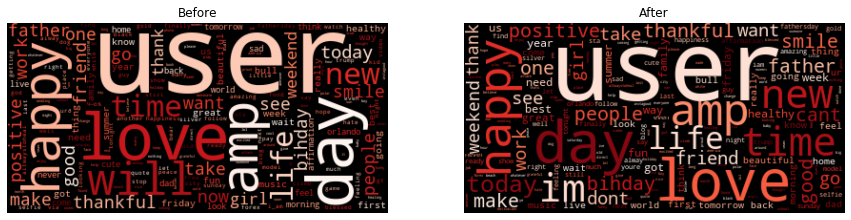

In [17]:
words1 = ' '.join([text for text in train['tweet']])
words2 = ' '.join([text for text in train['tweet2']]) 

wc1 = WordCloud(max_words=200,colormap="Reds",collocations=False).generate(words1)
wc2 = WordCloud(max_words=200,colormap="Reds",collocations=False).generate(words2)

fig,plots= plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)

plots[0].imshow(wc1,interpolation="bilinear")
plots[1].imshow(wc2,interpolation="bilinear")

plots[0].set_title('Before')
plots[1].set_title('After')
plots[0].axis("off")
plots[1].axis("off")

plt.show()

הגרפים הם עננות המציגות את המילים הנפוצות לפני ואחרי מחיקת כמה מילים נפוצות. המסקנה שאנחנו רואים מהגרף הראשון שמילות הקישור הם הכי נפוצות בניגוד לגרף שאחרי.

## Removing common  words that do not contribute

In [39]:
common_words=pd.Series(' '.join(train['tweet2']).split()).value_counts()[:10]
wordsTOremove=['user','amp']
train['tweet2'] = train['tweet2'].apply(lambda y: " ".join(x for x in y.split()
                                                           if x not in wordsTOremove))

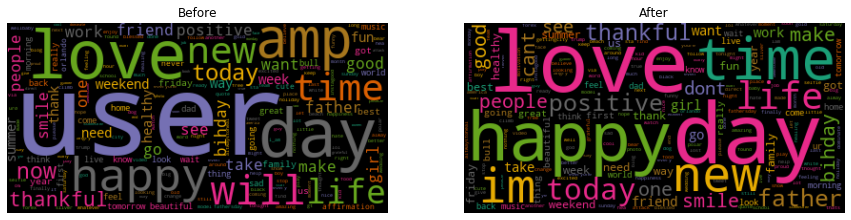

In [40]:
words1 = ' '.join([text for text in train['tweet']])
words2 = ' '.join([text for text in train['tweet2']]) 

wc1 = WordCloud(max_words=200,collocations=False,colormap="Dark2").generate(words1)
wc2 = WordCloud(max_words=200,collocations=False,colormap="Dark2").generate(words2)

fig,plots= plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)

plots[0].imshow(wc1,interpolation="bilinear")
plots[1].imshow(wc2,interpolation="bilinear")

plots[0].set_title('Before')
plots[1].set_title('After')
plots[0].axis("off")
plots[1].axis("off")

plt.show()

הגרפים הם עננות המציגות את המילים הנפוצות לפני ואחרי מחיקת כמה מילים נפוצות.
המסקנה שאנחנו רואים מהגרף שאחרי שכמה מילים נעלמות(אלה שמחקנו) .

## Removing rare words that do not contribute

In [7]:
rare_words=pd.Series(' '.join(train['tweet2']).split()).value_counts()[-10:]
wordsTOremove=['imhaw16','happinessindex','rallyofthecorn','brooklynmediallc','greatnessawaits',
               'ellum','cambersands']
train['tweet2'] = train['tweet2'].apply(lambda y: " ".join(x for x in y.split()
                                                        if x not in wordsTOremove))

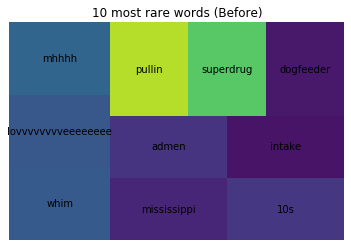

In [51]:
squarify.plot(sizes=list(rare_words),label=list(rare_words.index))
plt.title('10 most rare words (Before)')
plt.axis('off')
plt.show()

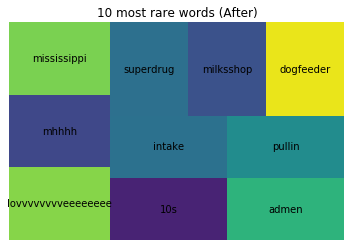

In [52]:
freq= pd.Series(' '.join(train['tweet2']).split()).value_counts()[-10:]
squarify.plot(sizes=list(freq),label=list(freq.index))
plt.title('10 most rare words (After)')
plt.axis('off')
plt.show()

הגרפים מציגים את 10 המילים הנדירים בטוטיים לפני ואחרי מחיקת קמה מילים נדירות .
המסקנה היא שהמילים שהיו נדירות קודם השתנו כך שכמה מהם נעלמו.

## Correcting Writing errors

In [29]:
spell = SpellChecker()
train['tweet2'] = train['tweet2'].apply(lambda y: " ".join(spell.correction(x) for x in y.split()))
                                        

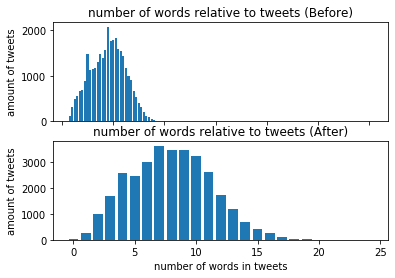

In [41]:
#Tweets before and after
tweets=train["tweet"].to_list()
tweets2=train["tweet2"].to_list()

# Values before
values={}
for tweet in tweets:
    num_words=len(word_tokenize(tweet))
    if num_words in values:
        values[num_words]+=1
    else:
        values[num_words]=1
        
# Values after
values2={}
for tweet in tweets2:
    num_words=len(word_tokenize(tweet))
    if num_words in values2:
        values2[num_words]+=1
    else:
        values2[num_words]=1

# Graph : Number of words relative to tweets (before & after)
fig,plots= plt.subplots(2)

plots[0].bar(list(values.keys()),list(values.values()))
plots[1].bar(list(values2.keys()),list(values2.values()))

plots[0].set_title('number of words relative to tweets (Before)')
plots[1].set_title('number of words relative to tweets (After)')

for ax in plots.flat:
    ax.set(xlabel='number of words in tweets', ylabel='amount of tweets')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in plots.flat:
    ax.label_outer()

plt.show()

הגרפים מציגים מספר המילים ביחס לטוטיים לפני ואחרי תיקון שגיאות הכתיב.
המסקנה היא שתדירות המילים גדלה וזה השפיע על הגרף כמופיע בגרף התחתון.

# Summary

# 1)

למדנו במעבדה זו מה הם השלבים הראשונים שחיביים לעשות לפני שנתחיל בשלב עיבוד הטקסט (לפני יצירת המילון).השלב הראשון הוא הכרת הנתונים שלנו דרך וויזואליזציה ודרך הנתונים עצמם למשל כמות מילים,כמות אותיות,מילים נפוצות,מילים נדירות,ממוצע אורך מילה
שלב השני הוא וויזואליזציה שכך שתפקידה לעזור לנו בהכרת הנתונים שלנו וגם עוזרת לנו בשלבי העיבוד המקדים (מפורט בסעיף 2) ,השלב האחרון הוא עיבוד מקדים שהוא השלב החשוב ביותר כך שלפני כל ניתוח ועיבוד בנתונים צריך לעשות את השלב הזה לא משנה מה הוא סוג הנתונים כך שמטרתו היא להכין את הנתונים שלנו לשלב העיבוד  

# 2)

ויזואליזציה כלי חשוב להבין את הנתונים דרך הצגה גרפית. במעבדה הזת השתמשנו בכמה ויזואליזציות שעזרה לנו לראות המילים הכי נפוצות
stopword ושכדי לנו להסיר מילים שלא תורמות לנו כמו

# 3) 

שמציג לנו אחוזי ראשי הטיבות מכלל המילים כך שהגרף יחולק לשני חלקים חלק המהווה ראשי הטיבות ושאר המילים pie chart לעשות גרף
 המייצג מילים והתדירות שלהם כך שזה יעזור לנו בבניית המילון כך שאנחנו צריכים את המילים עם התדירות שלהם bar chart לעשות גרף  
 המיצג תדירות משפטים או אוסף מילים או ביטוויים הנפוציים ביותר מכלל הטווטים  tree map לעשות גרף


# 4)

סדר שלבי העיבוד המקדים חשוב לניקוי הנתונים בצורה טובה כמו שלב הסרת סימני ניקוד ותווים מיוחדים ו הסרת מילים הנפוצות ביותר שאינן תורמות לנו

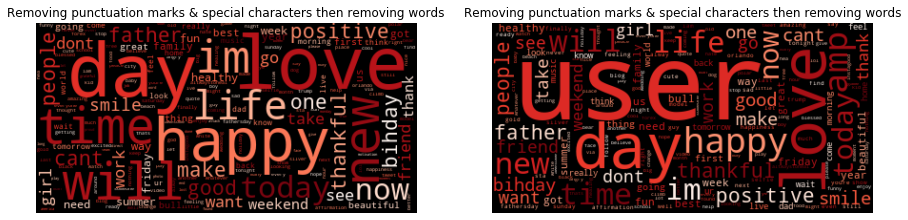

In [12]:
def Clean(word):
    return re.sub('[^A-Za-z0-9]+', '', word)
wordsTOremove=['user','amp']

train['tweet2'] = train['tweet'].apply(lambda y: " ".join(Clean(x) for x in y.split()))
train['tweet2'] = train['tweet2'].apply(lambda y: " ".join(x for x in y.split()
                                                          if x not in wordsTOremove))

train['tweet3'] = train['tweet'].apply(lambda y: " ".join(x for x in y.split()
                                                          if x not in wordsTOremove))
train['tweet3'] = train['tweet3'].apply(lambda y: " ".join(Clean(x) for x in y.split()))

words1 = ' '.join([text for text in train['tweet2']]) 
wc1 = WordCloud(max_words=200,colormap="Reds",collocations=False).generate(words1)
words2 = ' '.join([text for text in train['tweet3']]) 
wc2= WordCloud(max_words=200,colormap="Reds",collocations=False).generate(words2)

fig,plots= plt.subplots(1,2)
fig.set_figheight(15)
fig.set_figwidth(15)

plots[0].imshow(wc1,interpolation="bilinear")
plots[1].imshow(wc2,interpolation="bilinear")
plots[0].set_title('Removing punctuation marks & special characters then removing words')
plots[1].set_title('Removing punctuation marks & special characters then removing words')
plots[0].axis("off")
plots[1].axis("off")
plt.show()

# 5)

 לפי מה שלמדנו בכורס מבוא לכריית נתונים שיש שלבים קודמים לניתוח ועיבוד הנתונים והם הכרת נתונים ויזואליזציה ועיבוד מקדים שמטרתם היא להכין את הנתונים שלנו לשלב העיבוד .וזה מה שעשינו במעבדה זו בדיוק 